## Drawing the owl
I think for McElreath this stands in for knowledge and the model

1. State a clear question (what do you want to know? what is the estimand?)
2. Sketch the causal assumptions (i.e. draw a DAG)
3. Define a generative model (and generate the data)
4. Use the generative model to build and _test_ an estimator (for the estimand)
5. Invert and use the real data to produce an estimate of the estimand



### Notebook and data set-up 

In [2]:
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
from scipy import stats as stats
from pathlib import Path

def load_data(dataset: str, delimiter: str = ";", data_path: str = "."):
    """
    load one of the rethinking data sets

    Parameters
    ----------
    dataset: str
        name of the dataset to load
    delimiter: str, optional
        column separator in the file, by default ";"
    data_path: str, optional
        path to the directory where the data file is located, by default "."

    Returns
    -------
    pl.DataFrame
        the data loaded into a polars dataframe

    """
    fname = f"{dataset}.csv"
    data_file = Path(data_path) / fname
    return pl.read_csv(data_file, separator=delimiter)

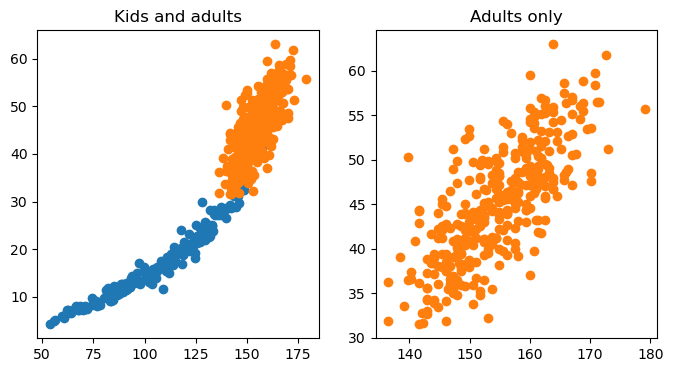

In [3]:
HOWELL = load_data("Howell1", delimiter=";", data_path="./data")
fig, axs = plt.subplots(1, 2, figsize=(8,4))

KIDS = HOWELL.filter(pl.col("age") <= 18)
ADULTS = HOWELL.filter(pl.col("age") > 18)

plt.sca(axs[0])
plt.scatter(x=KIDS["height"], y=KIDS["weight"], color="C0")
plt.scatter(x=ADULTS["height"], y=ADULTS["weight"], color="C1")
plt.title("Kids and adults")

plt.sca(axs[1])
plt.scatter(x=ADULTS["height"], y=ADULTS["weight"], color="C1")
plt.title("Adults only")

plt.show()


### 1. State a clear question (what do you want to know? what is the estimand?)
Amongst adults, and assuming that a linear model explains the relationship between height and weight, then what is our best estimate of the slope and intercept of that line?

In [4]:
ADULTS.describe()

describe,height,weight,age,male
str,f64,f64,f64,f64
"""count""",346.0,346.0,346.0,346.0
"""null_count""",0.0,0.0,0.0,0.0
"""mean""",154.644369,45.045543,41.53974,0.473988
"""std""",7.773564,6.45522,15.809304,0.500046
"""min""",136.525,31.524644,19.0,0.0
"""25%""",148.59,40.312989,29.0,0.0
"""50%""",154.305,45.019006,40.0,0.0
"""75%""",160.655,49.384829,51.0,1.0
"""max""",179.07,62.992589,88.0,1.0
